In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt
import numpy as np

cred = credentials.Certificate("nonogram-48dd4-firebase-adminsdk-glxux-6872f3bf40.json")
firebase_admin.initialize_app(cred)

In [2]:
added = ['Star']

In [3]:
db = firestore.client()


levels_ref = db.collection("levels")
docs = levels_ref.stream()
grids = {}
for doc in docs:
    if doc.to_dict()["name"] in added:
        continue
    print("GameLevel(\nnumber:")
    for key, value in doc.to_dict().items():
        if key == "goal":
            grids.update({doc.to_dict()["name"]: value})
        if key == "name":
            print(f"    puzzleName: '{value}',")
        else:
            print(f"{key}: {value},")
    print(")")

GameLevel(
number:
height: 8,
width: 5,
columnIndications: [[6],[1,3],[1,2,1],[3,1],[6]],
goal: [[0,1,1,1,0],[1,0,0,1,1],[1,0,0,1,1],[1,0,1,0,1],[1,0,1,0,1],[1,1,0,0,1],[1,1,0,0,1],[0,1,1,1,0]],
rowIndications: [[3],[1,2],[1,2],[1,1,1],[1,1,1],[2,1],[2,1],[3]],
    puzzleName: '0',
)
GameLevel(
number:
height: 7,
width: 5,
columnIndications: [[0],[1,1],[7],[1],[0]],
goal: [[0,0,1,0,0],[0,1,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,0,1,0,0],[0,1,1,1,0]],
rowIndications: [[1],[2],[1],[1],[1],[1],[3]],
    puzzleName: '1',
)
GameLevel(
number:
height: 9,
width: 7,
columnIndications: [[2,2],[2,3],[1,2,1],[1,2,1],[2,2,1],[4,1],[2,2]],
goal: [[0,1,1,1,1,1,0],[1,1,0,0,1,1,1],[1,0,0,0,0,1,1],[0,0,0,0,1,1,0],[0,0,0,1,1,0,0],[0,0,1,1,0,0,0],[0,1,1,0,0,0,0],[1,1,0,0,0,0,1],[1,1,1,1,1,1,1]],
rowIndications: [[5],[2,3],[1,2],[2],[2],[2],[2],[2,1],[7]],
    puzzleName: '2',
)
GameLevel(
number:
height: 10,
width: 5,
columnIndications: [[2,2],[1,1],[1,1,1],[1,1,1],[3,4]],
goal: [[0,1,1,1,0],[1,0,

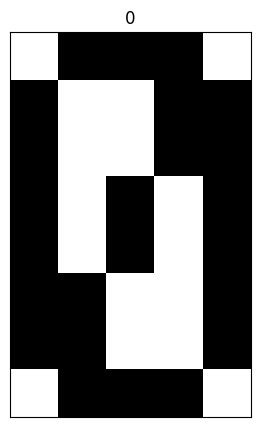

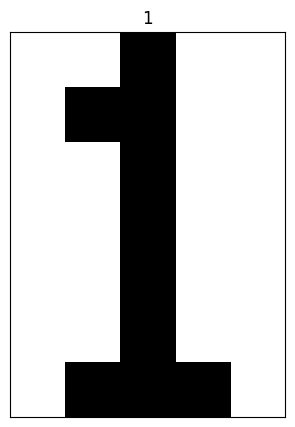

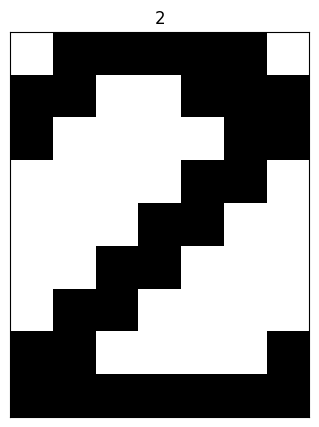

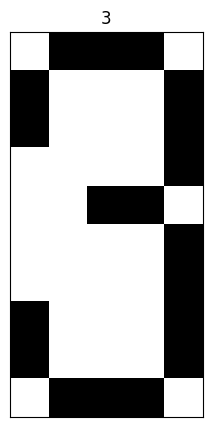

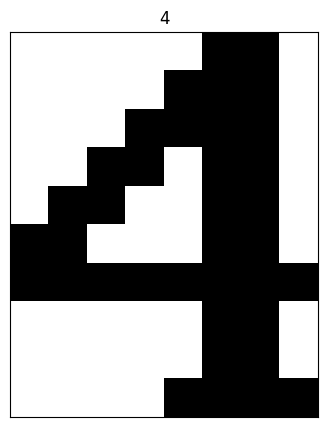

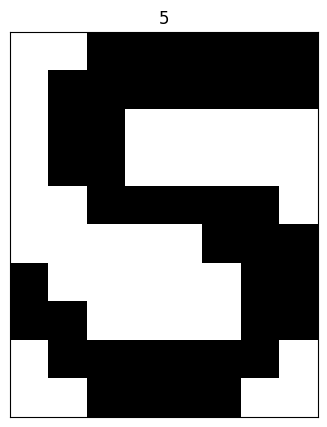

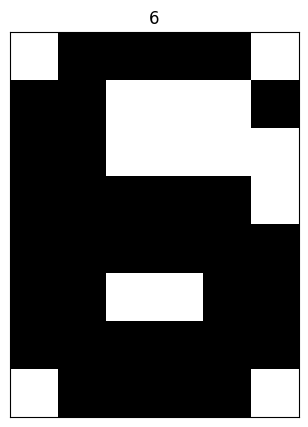

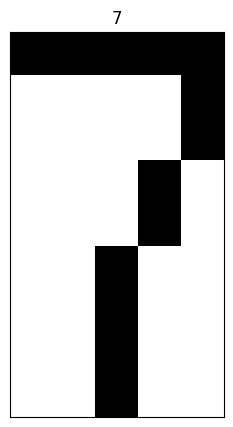

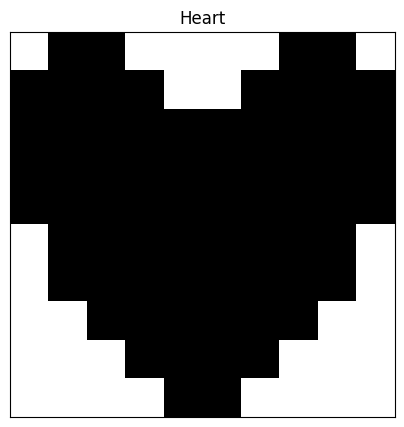

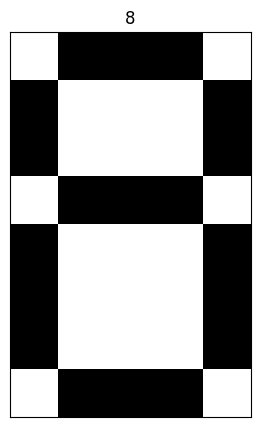

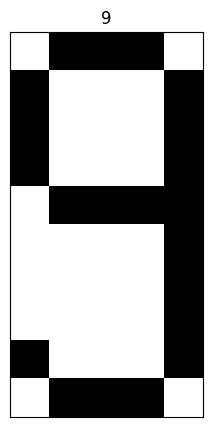

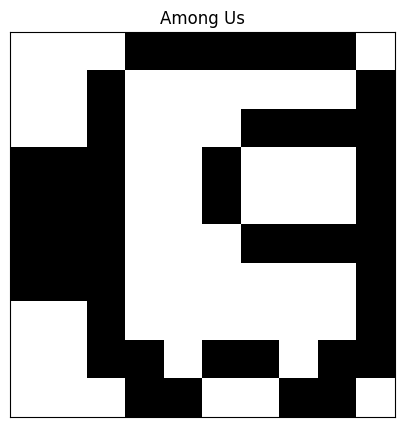

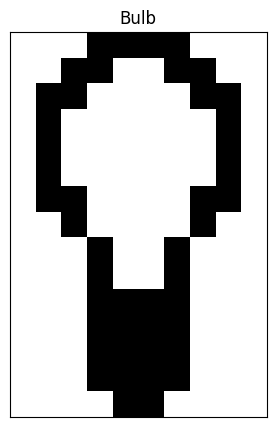

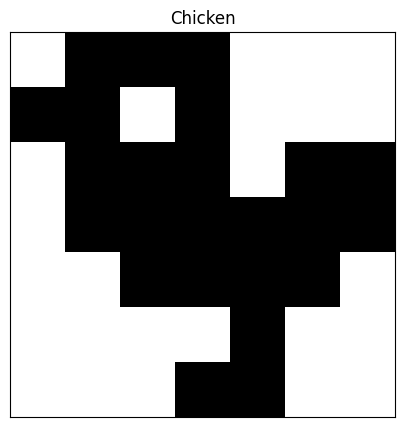

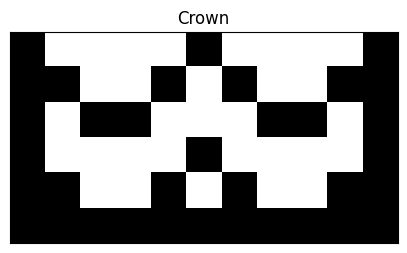

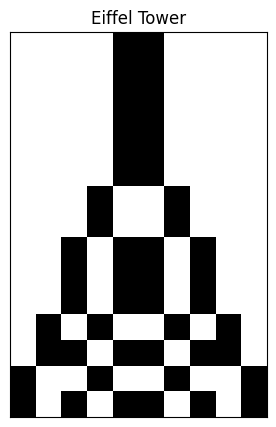

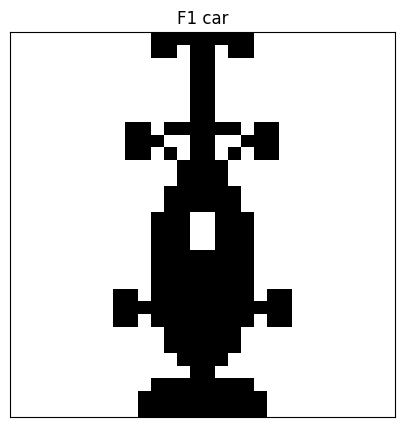

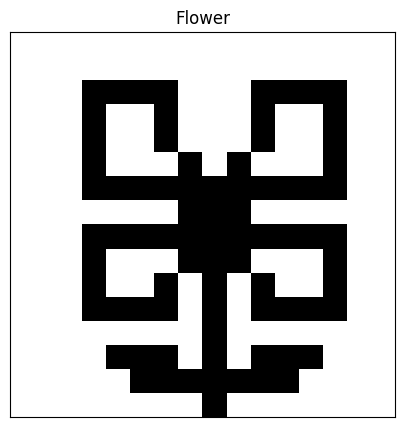

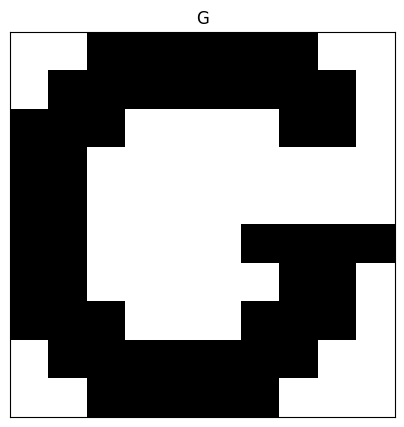

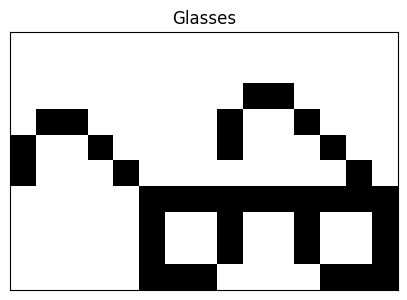

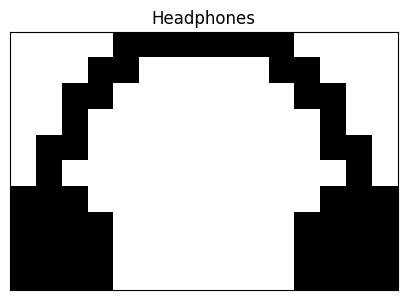

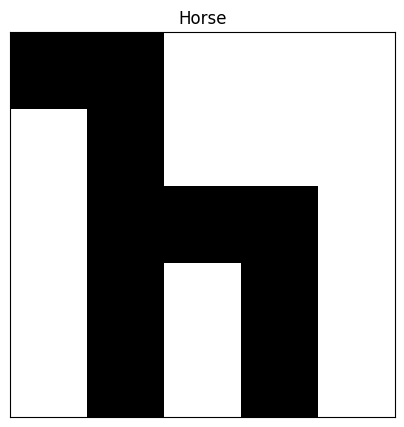

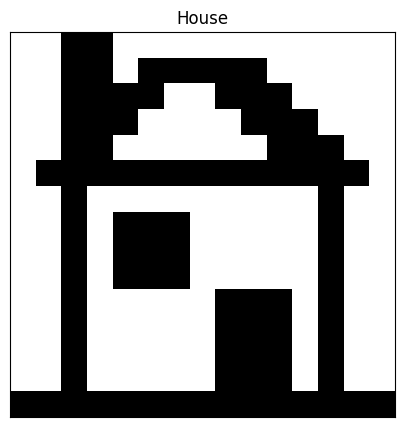

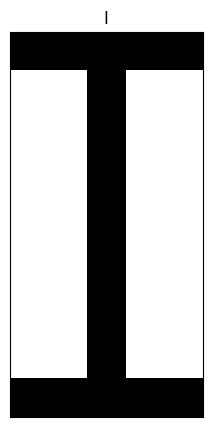

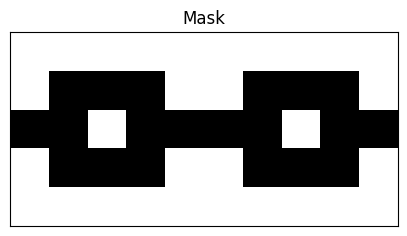

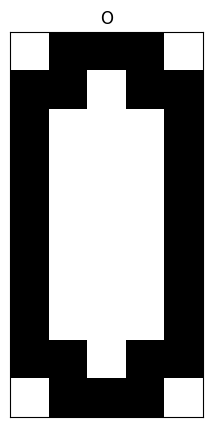

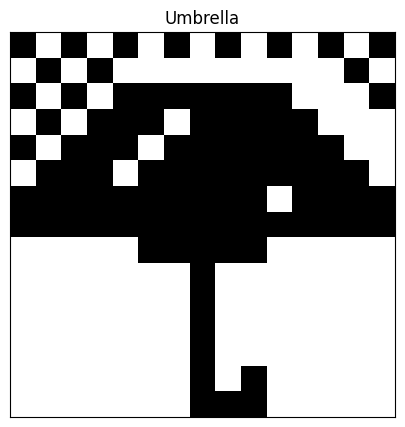

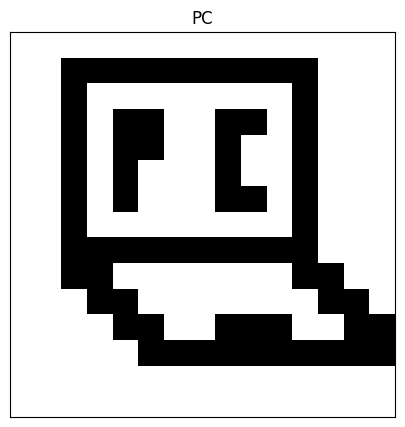

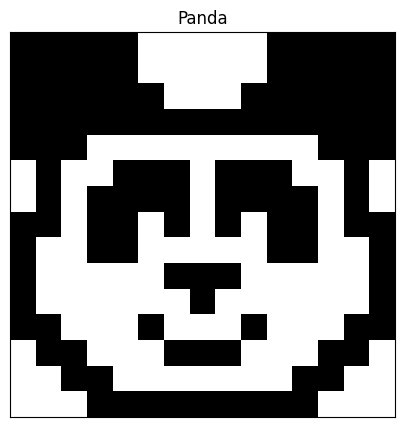

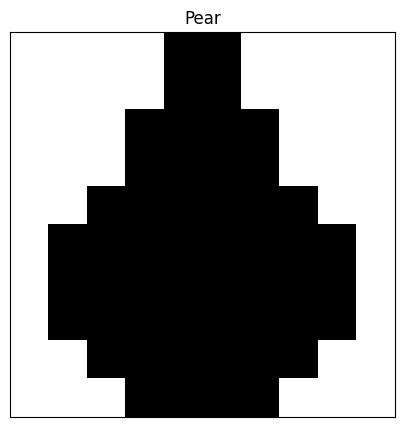

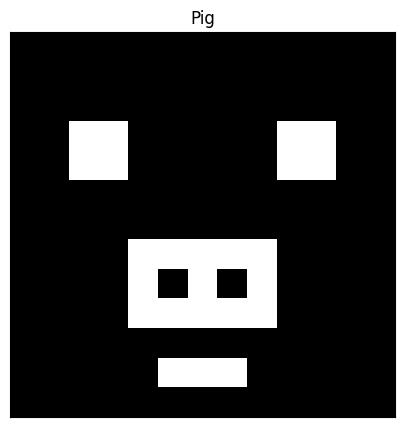

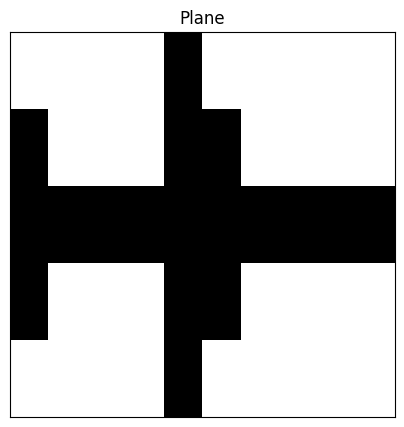

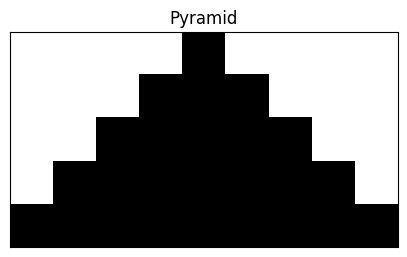

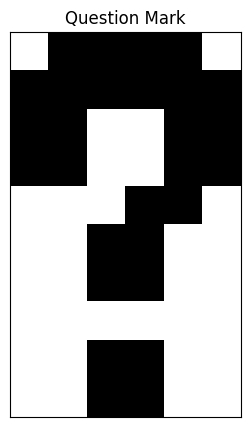

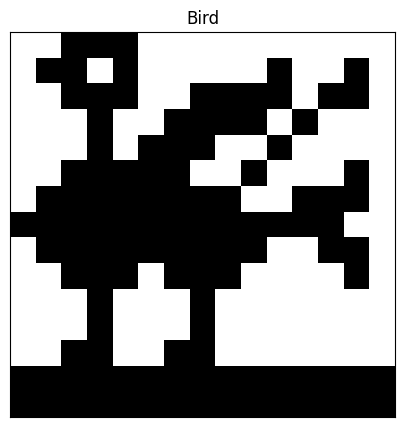

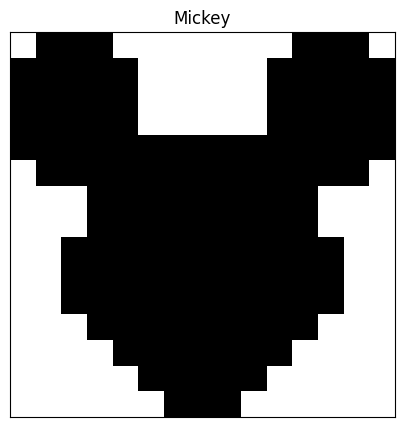

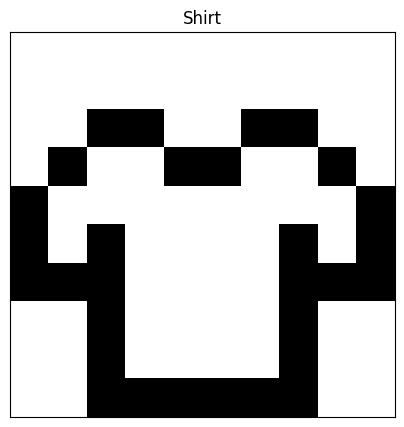

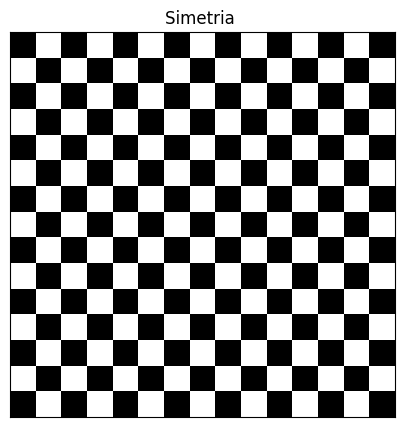

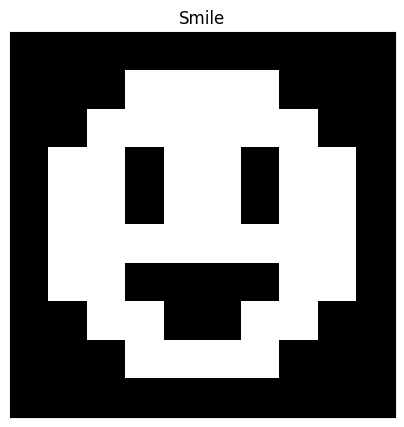

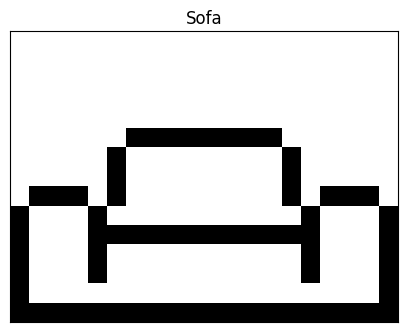

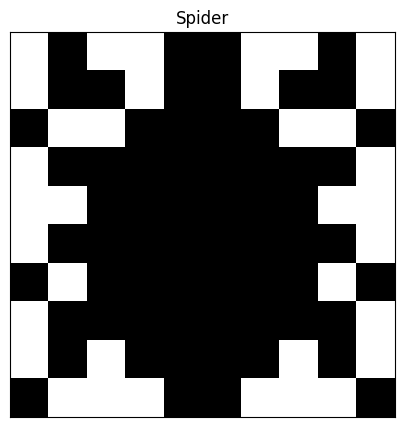

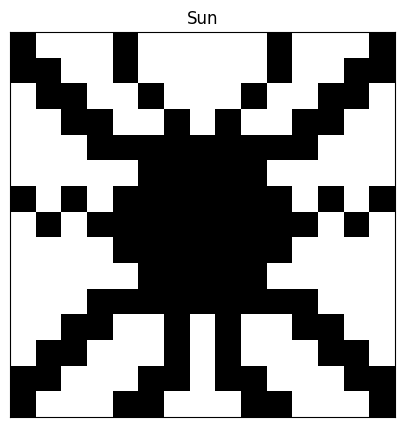

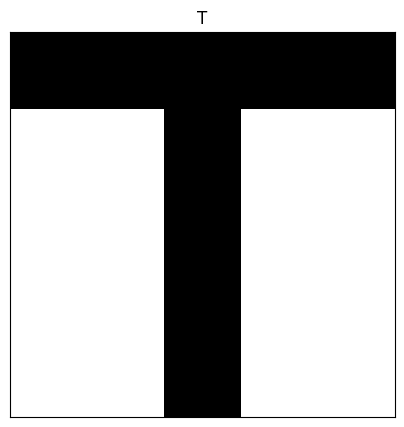

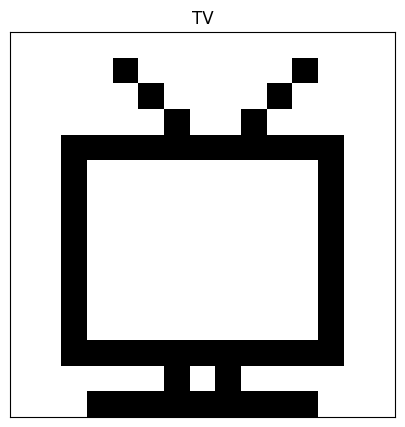

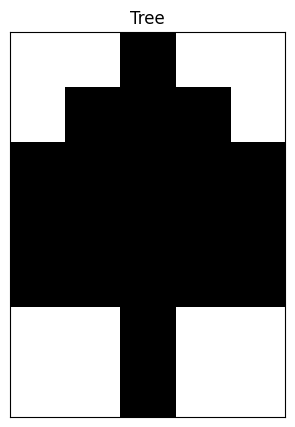

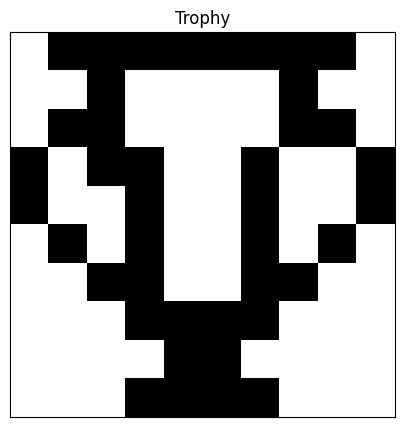

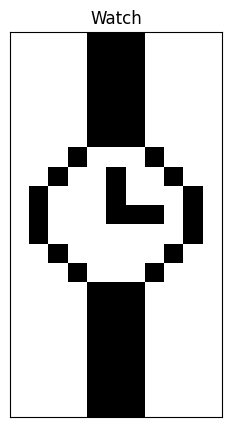

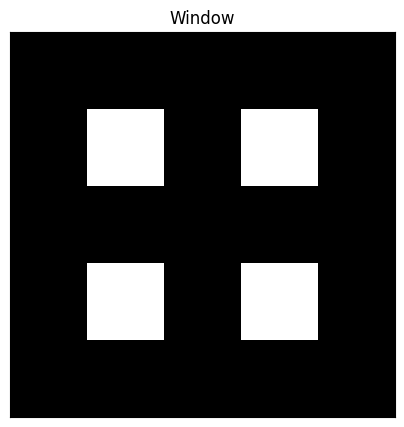

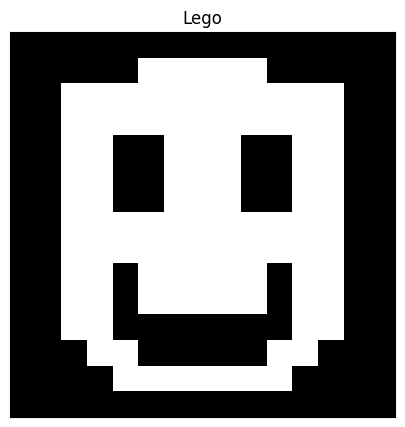

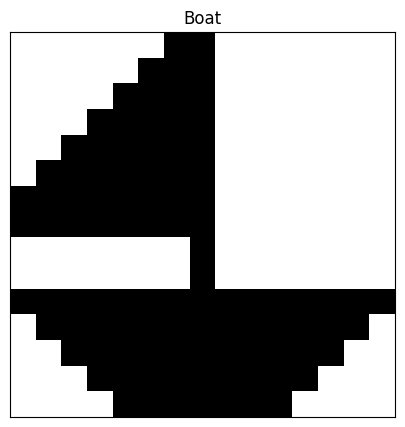

In [4]:
import ast

for title, puzzle_string in grids.items():
    puzzle = ast.literal_eval(puzzle_string)

    puzzle_array = np.array(puzzle)

    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(puzzle_array, cmap="Greys", aspect="equal")
    plt.xticks([])
    plt.yticks([])

    plt.show()

In [20]:
db = firestore.client()

levels_ref = db.collection("levels")
docs = levels_ref.stream()
puzzle = {}
for doc in docs:
    if doc.to_dict()["name"] == "Boat":
        for key, value in doc.to_dict().items():
            puzzle.update({key: value})


levels_ref.document(puzzle['name']).set(puzzle)

update_time {
  seconds: 1712016173
  nanos: 793329000
}